In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
import requests
from datetime import datetime
from config import weather_api_key

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats,lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [12]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0],coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

629

In [10]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [14]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
#for i in range(len(cities)):
for i , city in enumerate(cities):
    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    #city_url = url + "&q=" + cities[i]
    city_url = url + "&q=" + city.replace(" ","+")
    
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                            "Lat": city_lat,
                            "Lng": city_lng,
                            "Max Temp": city_max_temp,
                            "Humidity": city_humidity,
                            "Cloudiness": city_clouds,
                            "Wind Speed": city_wind,
                            "Country": city_country,
                            "Date": city_date})
    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass
    
# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")



    




Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | fairbanks
Processing Record 2 of Set 1 | busselton
Processing Record 3 of Set 1 | krasnyy kut
Processing Record 4 of Set 1 | vaini
Processing Record 5 of Set 1 | ushuaia
Processing Record 6 of Set 1 | husavik
Processing Record 7 of Set 1 | chokurdakh
Processing Record 8 of Set 1 | saskylakh
Processing Record 9 of Set 1 | punta arenas
Processing Record 10 of Set 1 | karaul
City not found. Skipping...
Processing Record 11 of Set 1 | kodiak
Processing Record 12 of Set 1 | sarankhola
Processing Record 13 of Set 1 | castro
Processing Record 14 of Set 1 | luena
Processing Record 15 of Set 1 | kazachinskoye
Processing Record 16 of Set 1 | tuktoyaktuk
Processing Record 17 of Set 1 | rikitea
Processing Record 18 of Set 1 | jumla
Processing Record 19 of Set 1 | shintomi
Processing Record 20 of Set 1 | havelock
Processing Record 21 of Set 1 | tasiilaq
Processing Record 22 of Set 1 | saint-philippe
Processin

Processing Record 43 of Set 4 | victoria
Processing Record 44 of Set 4 | namtsy
Processing Record 45 of Set 4 | halalo
City not found. Skipping...
Processing Record 46 of Set 4 | vilela
Processing Record 47 of Set 4 | sur
Processing Record 48 of Set 4 | komsomolskiy
Processing Record 49 of Set 4 | puerto ayora
Processing Record 50 of Set 4 | mana
Processing Record 1 of Set 5 | santa vitoria do palmar
Processing Record 2 of Set 5 | kalabo
Processing Record 3 of Set 5 | port blair
Processing Record 4 of Set 5 | gamba
Processing Record 5 of Set 5 | vestmannaeyjar
Processing Record 6 of Set 5 | baiyin
Processing Record 7 of Set 5 | roald
Processing Record 8 of Set 5 | ahuimanu
Processing Record 9 of Set 5 | beidao
Processing Record 10 of Set 5 | tars
Processing Record 11 of Set 5 | ancud
Processing Record 12 of Set 5 | bo phloi
Processing Record 13 of Set 5 | amderma
City not found. Skipping...
Processing Record 14 of Set 5 | fortuna
Processing Record 15 of Set 5 | chagda
City not found. S

Processing Record 36 of Set 8 | akureyri
Processing Record 37 of Set 8 | gondanglegi
Processing Record 38 of Set 8 | fez
Processing Record 39 of Set 8 | tumannyy
City not found. Skipping...
Processing Record 40 of Set 8 | hagerstown
Processing Record 41 of Set 8 | beringovskiy
Processing Record 42 of Set 8 | jati
Processing Record 43 of Set 8 | martinsburg
Processing Record 44 of Set 8 | manokwari
Processing Record 45 of Set 8 | te anau
Processing Record 46 of Set 8 | touros
Processing Record 47 of Set 8 | molina
Processing Record 48 of Set 8 | agvali
Processing Record 49 of Set 8 | harper
Processing Record 50 of Set 8 | aromashevo
Processing Record 1 of Set 9 | jasper
Processing Record 2 of Set 9 | belyy yar
Processing Record 3 of Set 9 | puri
Processing Record 4 of Set 9 | sampit
Processing Record 5 of Set 9 | marcona
City not found. Skipping...
Processing Record 6 of Set 9 | yarada
Processing Record 7 of Set 9 | dagana
Processing Record 8 of Set 9 | maceio
Processing Record 9 of Set

Processing Record 22 of Set 12 | college
Processing Record 23 of Set 12 | avera
Processing Record 24 of Set 12 | mangrol
Processing Record 25 of Set 12 | zhangye
Processing Record 26 of Set 12 | karratha
Processing Record 27 of Set 12 | narsaq
Processing Record 28 of Set 12 | ismailia
Processing Record 29 of Set 12 | sao filipe
Processing Record 30 of Set 12 | edd
Processing Record 31 of Set 12 | kiunga
Processing Record 32 of Set 12 | pahalgam
Processing Record 33 of Set 12 | marsh harbour
Processing Record 34 of Set 12 | ruatoria
City not found. Skipping...
Processing Record 35 of Set 12 | mandalgovi
Processing Record 36 of Set 12 | eydhafushi
Processing Record 37 of Set 12 | belmonte
Processing Record 38 of Set 12 | tateyama
Processing Record 39 of Set 12 | veraval
Processing Record 40 of Set 12 | asfi
Processing Record 41 of Set 12 | denpasar
Processing Record 42 of Set 12 | corner brook
Processing Record 43 of Set 12 | drayton valley
Processing Record 44 of Set 12 | manaure
Proces

In [17]:
len(city_data)

582

In [23]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Fairbanks,64.8378,-147.7164,10.00,66,90,21.85,US,21-04-09 01:30:02
1,Busselton,-33.6500,115.3333,64.00,65,0,1.99,AU,21-04-09 01:31:29
2,Krasnyy Kut,50.9500,46.9667,40.39,90,100,17.29,RU,21-04-09 01:31:29
3,Vaini,-21.2000,-175.2000,78.80,78,40,5.75,TO,21-04-09 01:31:29
4,Ushuaia,-54.8000,-68.3000,41.00,65,20,20.71,AR,21-04-09 01:31:30
5,Husavik,66.0449,-17.3389,24.80,50,90,12.66,IS,21-04-09 01:31:30
6,Chokurdakh,70.6333,147.9167,0.27,86,100,9.60,RU,21-04-09 01:31:30
7,Saskylakh,71.9167,114.0833,-8.09,99,100,7.78,RU,21-04-09 01:31:31
8,Punta Arenas,-53.1500,-70.9167,44.60,81,0,12.66,CL,21-04-09 01:31:31
9,Kodiak,57.7900,-152.4072,26.60,28,1,32.21,US,21-04-09 01:31:31


In [24]:
new_column_order = ["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_column_order]

In [25]:
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Fairbanks,US,21-04-09 01:30:02,64.8378,-147.7164,10.00,66,90,21.85
1,Busselton,AU,21-04-09 01:31:29,-33.6500,115.3333,64.00,65,0,1.99
2,Krasnyy Kut,RU,21-04-09 01:31:29,50.9500,46.9667,40.39,90,100,17.29
3,Vaini,TO,21-04-09 01:31:29,-21.2000,-175.2000,78.80,78,40,5.75
4,Ushuaia,AR,21-04-09 01:31:30,-54.8000,-68.3000,41.00,65,20,20.71


In [26]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [27]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

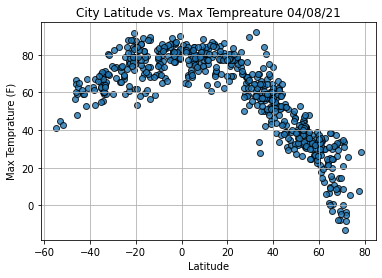

In [29]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
           edgecolor = "black", linewidths = 1, marker = "o", alpha = 0.8, label = "Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Tempreature " + time.strftime("%x"))
plt.ylabel("Max Temprature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

#Show plot.
plt.show()

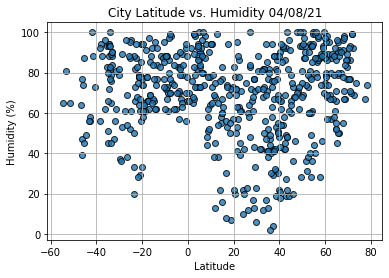

In [38]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            humidity,
            edgecolor = "black", linewidths = 1, marker = "o", alpha = 0.8, label = "Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity " + time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

#Show plot.
plt.show()

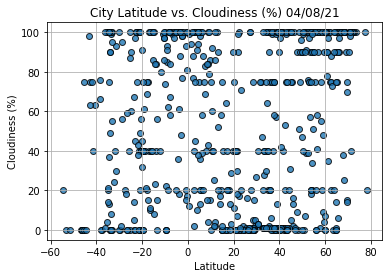

In [39]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            cloudiness,
            edgecolor = "black", linewidths = 1, marker = "o", alpha = 0.8, label = "Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) " + time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

#Show plot.
plt.show()

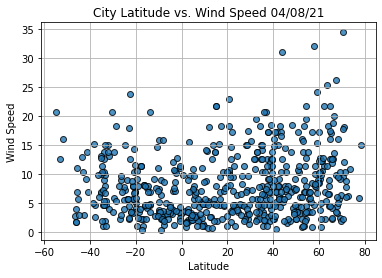

In [36]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            wind_speed,
            edgecolor = "black", linewidths = 1, marker = "o", alpha = 0.8, label = "Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed " + time.strftime("%x"))
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

#Show plot.
plt.show()